# Delft3D-Toolbox Documentation

Python package for running and modifying Delft3D FLOW model.

## Installation

---
To install into the environment of your choosing, run:  
`pip install git+https://github.com/Carlisle345748/Delft3D-Toolbox.git@master`

To uninstall run `pip uninstall delft3d-toolbox`.

## Usage

---

### 1. Run Delft3D FLOW simulation

The `delft3d` module support running Delft3D FLOW model. You can run one model in a time or set a list of models to run successively or in parallel. The class `delft3d.Simulation` provides the functionality of running Delft3D FLOW model. 

<br>

#### Create an `delft3d.Simulation` object
Please supply the path of Delft3D compiled source code

In [1]:
import delft3d

# supply the path of Delft3D compiled source code
sim = delft3d.Simulation('C:/Users/Carlisle/Desktop/62422/src/bin/x64')

<br>

#### Run Delft3D model
Supply the path of the (`.mdf`) file to run. You can run one model in a time or supply a list of models to run. If `workers` = 1, the list of models will run successively (one by one). If `workers` > 1,  the list of models will run in parallel (set `workers` = -1 to use all cpu cores). Set `disp` True to show simulation progress. Set `netcdf` True to save simulation result as netCDF file.

In [ ]:
# run simulation successively
sim.run('example/dflow1/f34.mdf') # run one simulation
sim.run('example/dflow1/f34.mdf', disp=False)  # no simulation progress
sim.run('example/dflow1/f34.mdf', netcdf=True)  # save simulation result as netcdf
sim.run(['example/dflow1/f34.mdf', 'example/dflow2/f342.mdf']) # run two simulation successively

In [ ]:
# run simulation in parallel
sim.run(['example/dflow1/f342.mdf', 'example/dflow2/f342.mdf'], workers=2) # 2 workeres
sim.run(['example/dflow1/f34.mdf', 'example/dflow2/f342.mdf'], workers=-1)  # use all cpu cores

<br>

#### Compare between parallelzation and succession

In [4]:
model_list = ['example/dflow1/f342.mdf', 'example/dflow2/f342.mdf',
              'example/dflow1/f34.mdf', 'example/dflow2/f34.mdf']
sim.run(model_list , workers=4)
sim.run(model_list , workers=1)

-------------------Parallelization------------------
All simulations completed. Total time=5.014573 s
---------------------Succession---------------------
Simulation f342.mdf completed. Time usage=1.962243 s
Simulation f342.mdf completed. Time usage=1.816061 s
Simulation f34.mdf completed. Time usage=2.098850 s
Simulation f34.mdf completed. Time usage=1.781167 s
All simulations completed. Total time=7.661315 s


### 2. Delft3D time-series file

`TimeSeriesFile` class provide a interface to read, modify and write Delft3D time-series file (`.bct, .bcc, .dis`).

<br>

#### Create an `TimeSeriesFile` object of a time-series file

In [5]:
import delft3d

# read files
bct = delft3d.TimeSeriesFile('example/example1.bct')
bcc = delft3d.TimeSeriesFile('example/example1.bcc')
dis = delft3d.TimeSeriesFile('example/example1.dis')

<br>

#### Show the header of the file

The number '0' means the first time-serie in the file.

In [6]:
bct.data[0].header

{'table-name': Boundary Section : 1,
 'contents': Uniform,
 'location': (2,246)..(7,246),
 'time-function': non-equidistant,
 'reference-time': 20200331,
 'time-unit': minutes,
 'interpolation': linear,
 'parameter': {'time': time unit=min,
  'water elevation (z)  end A': water elevation (z)  end A unit=m,
  'water elevation (z)  end B': water elevation (z)  end B unit=m},
 'records-in-table': 433}

<br>

#### Show the time-series data of the file

The number '0' means the first time-serie in the file.

In [7]:
bct.data[0].time_series.head()

,time,water elevation (z) end A,water elevation (z) end B
2020-03-31 00:00:00,0.0,0.4077,0.4077
2020-03-31 00:10:00,10.0,0.4282,0.4282
2020-03-31 00:20:00,20.0,0.4707,0.4707
2020-03-31 00:30:00,30.0,0.5127,0.5127
2020-03-31 00:40:00,40.0,0.5692,0.5692


<br>

#### Modify header and data of the time-series
The new data must be provided as a dict. The key of the dict is the name of the header and the value is the new content of the header.

In [8]:
import pandas as pd

flow_series_A = pd.read_csv('example/flow_series_A.csv', index_col=0)
flow_series_A.index = pd.to_datetime(flow_series_A.index)
flow_series_B = pd.read_csv('example/flow_series_B.csv', index_col=0)
flow_series_B.index = pd.to_datetime(flow_series_B.index)

# modify header
bct.set_header(0, {'time-unit': 'hours', 'location': '(2,3)..(4,6)'})

# modify time-series data
bct.set_time_series(0, '2020-03-31', flow_series_A, flow_series_B)

<br>

#### Export the data to a list in the format of Delft3D time series file

In [9]:
# The whole time-series file is too long. Only show the first 10 row here.
bct_file = bct.export()
bct_file[0:10]

["table-name           'Boundary Section : 1'\n",
 "contents             'Uniform             '\n",
 "location             '(2,3)..(4,6)        '\n",
 "time-function        'non-equidistant'\n",
 'reference-time       20200331\n',
 "time-unit            'hours  '\n",
 "interpolation        'linear'\n",
 "parameter            'time                '                     unit '[min]'\n",
 "parameter            'water elevation (z)  end A'               unit '[m]'\n",
 "parameter            'water elevation (z)  end B'               unit '[m]'\n"]

<br>    
    
#### Write the data to a Delft3D time series file

In [10]:
bct.to_file('example1.bct')

<br>

### 3. Delft3D mdf file

`MdfsFile` class provide a interface to read, modify and write Delft3D mdf file (`.mdf`).

<br>

#### Create an `MdfFile` object of a mdf file

In [11]:
import delft3d
mdf = delft3d.MdfFile('example/example1.mdf')

<br>

#### Show the content of the mdf file

In [14]:
mdf.data

{'Ident': 'Delft3D-FLOW 3.59.01.57433',
 'Filcco': 'river.grd',
 'Anglat': 22.56,
 'Grdang': 228.3,
 'Filgrd': 'river.enc',
 'MNKmax': array([  8., 246.,   1.]),
 'Thick': 100.0,
 'Fildep': 'river.dep',
 'Itdate': '2020-03-31',
 'Tunit': 'M',
 'Tstart': 0.0,
 'Tstop': 4320.0,
 'Dt': 0.1,
 'Tzone': 8.0,
 'Sub1': '    ',
 'Sub2': ' C ',
 'Namc1': 'spill               ',
 'Wnsvwp': 'N',
 'Wndint': 'Y',
 'Zeta0': 0.41335,
 'C01': 0.4395,
 'Filbnd': 'river.bnd',
 'FilbcT': 'river.bct',
 'FilbcC': 'river.bcc',
 'Rettis': array([[0.],
        [0.]]),
 'Rettib': array([[0.],
        [0.]]),
 'Ag': 9.81,
 'Rhow': 1000.0,
 'Tempw': 15.0,
 'Salw': 31.0,
 'Wstres': array([6.30e-04, 0.00e+00, 7.23e-03, 1.00e+02, 7.23e-03, 1.00e+02]),
 'Rhoa': 1.0,
 'Betac': 0.5,
 'Equili': 'N',
 'Ktemp': 0.0,
 'Fclou': 0.0,
 'Sarea': 0.0,
 'Temint': 'Y',
 'Roumet': 'M',
 'Ccofu': 0.02929358,
 'Ccofv': 0.03331361,
 'Xlo': 0.0,
 'Vicouv': 24.29591,
 'Dicouv': 20.05919,
 'Htur2d': 'N',
 'Irov': 0.0,
 'Iter': 2.0,
 'Dr

<br>

#### Set new value for a parameter
The new data must be provided as a dict. The key of the dict is the name of the parameter and the value is the new content of the parameter. 

**IMPORTANT** : when setting new values for parameters with multiple values (single-line or multiple-line array parameter e.g. 'Flmap'), please supply iterable data type such as list, tuple and ndarray.

In [15]:
mdf.set_parm({'Fildep': 'river.dep', 'Dt': 0.5, 'Flmap':[0, 10, 4320]})

<br>

#### Add new parameter
The new data must be provided as a dict. The key of the dict is the name of the parameter and the value is the new content of the parameter. 

In [16]:
mdf.add_parm({'FlNcdf': 'map his dro fou'})

<br>

#### Export the data to a list in the format of Delft3D mdf file

In [17]:
# The whole ndf file is too long. Only show the first 10 row here.
mdf_file = mdf.export()
mdf_file[0:10]

['Ident  = #Delft3D-FLOW 3.59.01.57433#\n',
 'Filcco = #river.grd#\n',
 'Anglat = 2.2560000e+01\n',
 'Grdang = 2.2830000e+02\n',
 'Filgrd = #river.enc#\n',
 'MNKmax = 8 246 1\n',
 'Thick  = 1.0000000e+02\n',
 'Fildep = #river.dep#\n',
 'Itdate = #2020-03-31#\n',
 'Tunit  = #M#\n']

<br>

#### Write the data to a Delft3D mdf file

In [18]:
mdf.to_file('example1.mdf')

<br>

### 4. Delft3D grd file

`GrdFile` class provide a interface to read, modify and write Delft3D grd file (`.grd`).

<br>

#### Create an `GrdFile` object of a grd file

In [19]:
import delft3d
grd = delft3d.GrdFile('example/example1.grd')

<br>

#### Convert coordinate system
Convert coordinate system between spherical and cartesian.

Default spherical coordinate system: **WGS 84**.

Default cartesian coordinate system: **WGS_1984_Web_Mercator_Auxiliary_Sphere**.

Find the EPSG of more coordinate system in the following link.
https://developers.arcgis.com/javascript/3/jshelp/pcs.htm

In [20]:
# Cartesian_to_spherical
grd.cartesian_to_spherical()
grd.cartesian_to_spherical(car_epsg=26917, sph_epsg=4326)

# Spherical_to_cartesian
grd.spherical_to_cartesian()
grd.spherical_to_cartesian(sph_epsg=4326, car_epsg=26917)

<br>

#### Find the nearest grid for the giving coordinate
If the coordinate system is spherical, it will be automatically convert to cartesian coordinate system.
You can specify the EPSG of coordiante by supplying `sph_egsp` and `car_epsg`.Find the EPSG of more coordinate system in the following link.
https://developers.arcgis.com/javascript/3/jshelp/pcs.htm

In [21]:
m1, n1 = grd.get_nearest_grid(505944.89, 2497013.47)
m2, n2 = grd.get_nearest_grid(505944.89, 2497013.47, sph_epsg=4326, car_epsg=26917)

<br>

#### Visualize the grid.
If the coordinate system is spherical, it will be automatically
convert to cartesian coordinate system. You can specify the EPSG of coordiante
by supplying `sph_egsp` and `car_epsg`. Find the EPSG of more coordinate system in
the following link. https://developers.arcgis.com/javascript/3/jshelp/pcs.htm

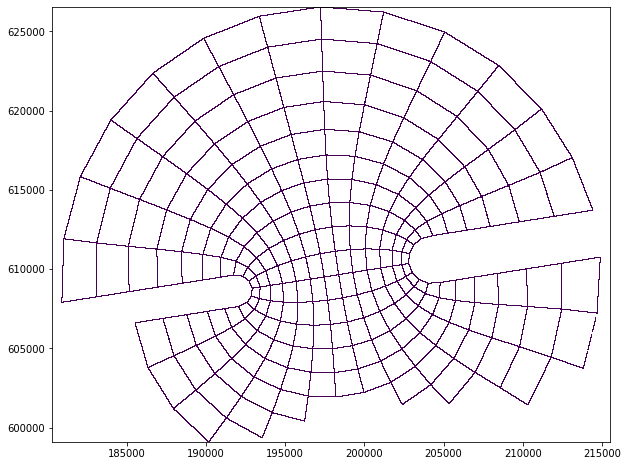

In [22]:
grd.plot()

<br>

#### Set new grid.

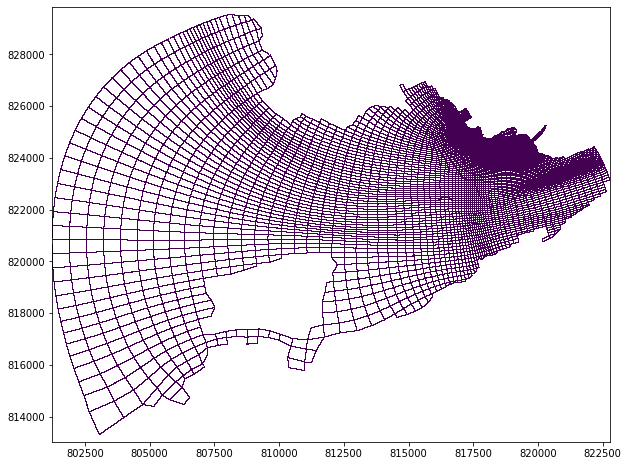

In [23]:
import numpy as np

grd_x = np.loadtxt('example/grd_x.txt')
grd_y = np.loadtxt('example/grd_y.txt')
grd.set_gird(grd_x, grd_y, 'Cartesian')
grd.plot()

<br>

#### Export the data to a list in the format of Delft3D grd file

In [24]:
grd.export()[0:10]

['Coordinate System = Cartesian\n',
 '      99      73\n',
 ' 0 0 0\n',
 ' ETA=    1   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00\n',
 '             0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00\n',
 '             0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00\n',
 '             0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00\n',
 '             0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00\n',
 '             0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00   0.00000000000000000E+00\n',
 '             0.00000000000000000E+00   0.000

<br>

#### Write the data to a Delft3D grd file

In [25]:
grd.to_file('example1.dep')

<br>

### 5. Delft3D grd file

`DepFile` class provide a interface to read, modify and write Delft3D dep file (`.grd`).

<br>

#### Create an `DepFile` object of a dep file
To create an `DepFile` object you need to supply the connected `.grd` file. You can supply the path of the `.grd` file or its `GrdFile` object. 

In [26]:
import delft3d

# supply the path of the dep file and grd file
dep = delft3d.DepFile('example/example1.dep', 'example/example1.grd')
# supply the path of the dep file and the GrdFile object of the grd file
grd_file = delft3d.GrdFile('example/example1.grd')
dep_ = delft3d.DepFile('example/example1.dep', grd_file)

<br>

#### Visualize the depth
If the coordinate system is spherical, it will be automatically
convert to cartesian coordinate system. You can specify the EPSG of coordiante
by assigning sph_egsp and car_epsg. Find the EPSG of more coordinate system in
the following link. https://developers.arcgis.com/javascript/3/jshelp/pcs.htm

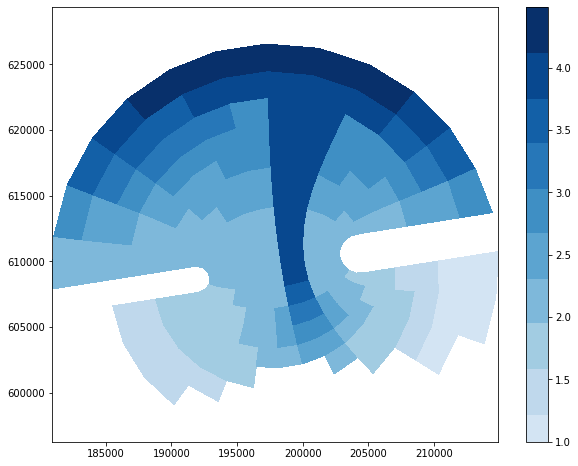

In [27]:
dep.plot()

<br>

#### Set new dep data

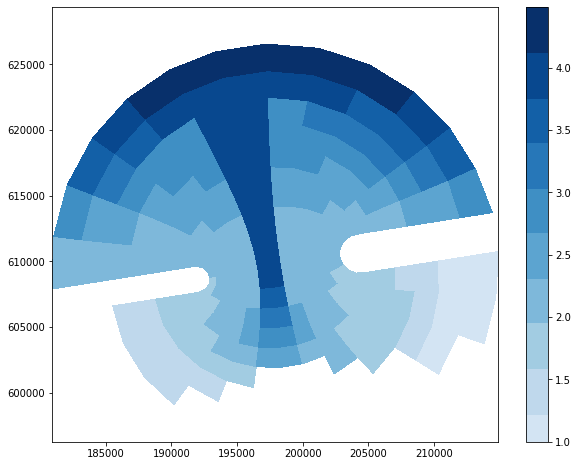

In [28]:
import numpy as np

dep_data = np.loadtxt('example/dep_data.txt')
dep.set_dep(dep_data)
dep.plot()

<br>

#### Export the data to a ndarry in the format of Delft3D dep file

In [29]:
dep_file = dep.export()
dep_file[0:10]

['  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02   1.0000000E+00\n',
 '   1.0000000E+00   1.0000000E+00  -9.9900000E+02\n',
 '  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02   1.2130000E+00   1.2030000E+00\n',
 '   1.2000000E+00   1.2140000E+00  -9.9900000E+02\n',
 '   1.3610000E+00   1.3460000E+00   1.3480000E+00   1.3640000E+00  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02   1.4250000E+00   1.4010000E+00\n',
 '   1.3870000E+00   1.3950000E+00  -9.9900000E+02\n',
 '   1.5060000E+00   1.4960000E+00   1.5050000E+00   1.5330000E+00   1.5770000E+00  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02  -9.9900000E+02   1.6880000E+00   1.6380000E+00   1.5880000E+00\n',
 '   1.5530000E+00   1.5420000E+00  -9.

<br>

#### Write the data to a Delft3D dep file

In [30]:
dep.to_file('example1.dep')